#### O objetivo deste trabalho é implementar o algoritmo de treinamento mediante Aprendizado Supervisionado do neurônio Perceptron de Rosenblatt, aplicado em problemas de classificação.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from prettytable import PrettyTable

from Perceptron import Perceptron
from Activations import Degree

# Preparação dos exemplos

In [2]:
examples = 'data/dataAll.txt'
nparray = np.fromfile(examples)
print(f'np array= {nparray} \nshape= {nparray.shape}')

np array= [-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ] 
shape= (3000,)


In [3]:
data = nparray.reshape(1000,3)
data

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [4]:
X = data[:, :2]
y = data[:, 2]

print(f'X: {X[:5]}\n')
print(f'Y: {y[:5]}')

X: [[-363.7884  244.1423]
 [ 328.7572 -256.7658]
 [-164.9827  613.2164]
 [ 536.5905  764.9575]
 [ 314.2297  343.8375]]

Y: [0. 1. 0. 0. 0.]


# 1. Treinamento do neurônio

Ao conduzir múltiplas execuções independentes de treinamento, algumas instâncias convergem em poucas épocas, enquanto outras requerem mais iterações. Esse comportamento decorre principalmente de dois fatores: a inicialização aleatória dos pesos e a ordem de apresentação dos exemplos. No caso em questão, a variação resulta sobretudo da primeira causa, pois não há embaralhamento dos dados na etapa de treino.

In [5]:
p= Perceptron(learning_rate=0.1)
activation= Degree()
epoch, adjusts = p.fit(X,y, activation)

print(f'\nConvergência em {epoch} épocas')
print(f'{adjusts} ajustes feitos')

Pesos iniciais: [-0.33378803  0.14641208  0.35662549]
Pesos após o treino: [ 1.66211974e-01  3.23555442e+02 -3.23154215e+02]

Convergência em 4 épocas
55 ajustes feitos


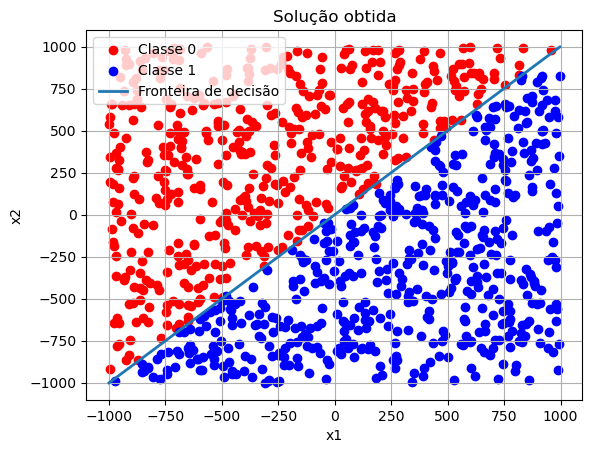

In [6]:
classe0 = X[y == 0]
classe1 = X[y == 1]

plt.scatter(classe0[:, 0], classe0[:, 1], label='Classe 0', marker='o', color='red')
plt.scatter(classe1[:, 0], classe1[:, 1], label='Classe 1', marker='o', color='blue')

w0, w1, w2 = p.w
x1_pts = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

if w2 != 0:
    x2_pts = -(w0 + w1 * x1_pts) / w2
    plt.plot(x1_pts, x2_pts, label='Fronteira de decisão', linewidth=2)
else:
    plt.axvline(x=-w0/w1, label='Fronteira de decisão', linewidth=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Solução obtida')
plt.grid()
plt.legend()
plt.show()

## 1.1. Resultados

Para fins ilustrativos, a seguir será conduzido um experimento cujo intuito é analisar como se comporta a convergência das instâncias de acordo com as combinações de pesos utilizadas. Serão executadas N rodadas independentes de treino, e registrados os pesos e a quantidade de épocas para a convergência.

In [7]:
n= 1000
results= []

for _ in range(n):
    p = Perceptron(learning_rate=0.1)
    activation = Degree()
    pesos_iniciais = p.w.copy()
    
    epoch, adjusts = p.fit(X, y, activation)
    
    results.append((*pesos_iniciais, epoch))

results = np.array(results)

Pesos iniciais: [-0.00706252 -0.18206421  0.44577741]
Pesos após o treino: [   0.49293748  323.22696579 -323.06506259]
Pesos iniciais: [ 0.14379705  0.2517748  -0.33252761]
Pesos após o treino: [   0.74379705  552.7430148  -553.23364761]
Pesos iniciais: [-0.29441233  0.38191709 -0.43886922]
Pesos após o treino: [ 3.05587670e-01  5.52873157e+02 -5.53339989e+02]
Pesos iniciais: [-0.40964904  0.2747432  -0.40405733]
Pesos após o treino: [ 1.90350961e-01  5.52765983e+02 -5.53305177e+02]
Pesos iniciais: [-0.45333646  0.16465676 -0.4009544 ]
Pesos após o treino: [  -0.25333646  136.00211676 -136.1578644 ]
Pesos iniciais: [0.10815456 0.10110722 0.17223326]
Pesos após o treino: [   0.60815456  323.51013722 -323.33860674]
Pesos iniciais: [ 0.44891489 -0.1129772   0.25319129]
Pesos após o treino: [   0.94891489  323.2960528  -323.25764871]
Pesos iniciais: [0.46036349 0.25615833 0.08772752]
Pesos após o treino: [   2.16036349  594.90025833 -592.68131248]
Pesos iniciais: [-0.23955897 -0.30136811  

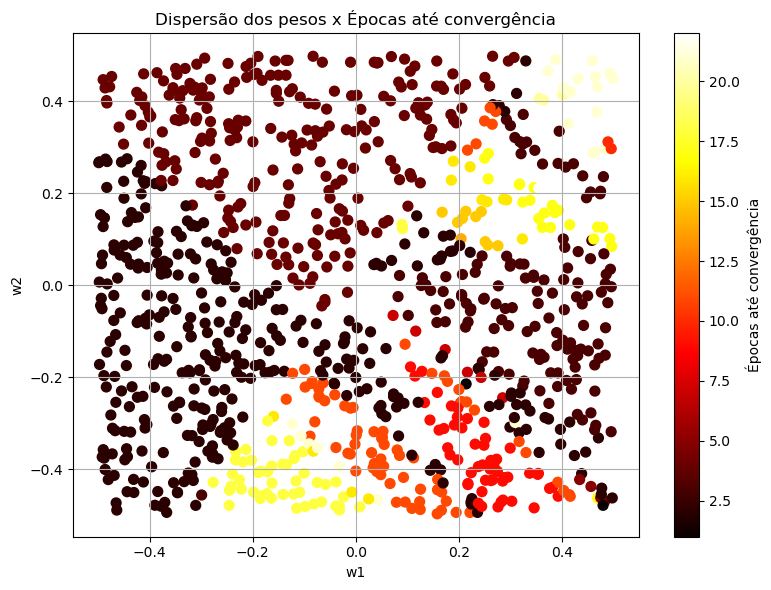

In [8]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(results[:, 1], results[:, 2], c=results[:, 3], cmap='hot', s=50)
plt.xlabel('w1')
plt.ylabel('w2')
cbar = plt.colorbar(scatter)
cbar.set_label('Épocas até convergência')
plt.title('Dispersão dos pesos x Épocas até convergência')
plt.grid(True)
plt.tight_layout()
plt.show()

Pode-se identificar no gráfico de dispersão as áreas com pesos que exigem mais épocas para o modelo aprender, provavelmente porque começam com uma direção de decisão ruim. 

# 2. Experimentação

Nesta etapa, serão feitos experimentos utilizando o neurônio construído na etapa anterior, utilizando as configurações a seguir:

$
\eta \times I = \{0{,}4, 0{,}1, 0{,}01\} \times \{(-100, +100), (-0{,}5, +0{,}5)\}
$

Em que $ I $ é o intervalo a ser utilizado para a distribuição uniforme do valor dos pesos e $ \eta $ é a taxa de aprendizagem. Assim, há 6 configurações a serem testadas, cada uma delas por 10 repetições.

In [9]:
learning_rates = [0.4, 0.1, 0.01]
weight_ranges = [(-100, 100), (-0.5, 0.5)]

examples = 'data/data1.txt'
nparray = np.fromfile(examples)

data = nparray.reshape(600,3)
X = data[:, :2]
y = data[:, 2]

results = []

for lr in learning_rates:
    for wr in weight_ranges:
        epocas_list = []
        ajustes_list = []
        
        for _ in range(10):
            p = Perceptron(learning_rate=lr, weight_range=wr)
            activation = Degree()
            
            ep, adj = p.fit(X, y, activation)
            epocas_list.append(ep)
            ajustes_list.append(adj)
        
        media_ajustes = np.mean(ajustes_list)
        desvio_ajustes = np.std(ajustes_list)
        menor_epoca = np.min(epocas_list)
        
        results.append((lr, wr, media_ajustes, desvio_ajustes, menor_epoca))

Pesos iniciais: [ 0.31721347 -0.1121962  -0.29511313]
Pesos após o treino: [-2.48278653  1.79006733  1.29884182]
Pesos iniciais: [-0.41586651  0.38007857 -0.099202  ]
Pesos após o treino: [-1.61586651  1.23460187  0.74838952]
Pesos iniciais: [ 0.37731659 -0.44127684  0.17715216]
Pesos após o treino: [-2.42268341  1.85076927  1.46766182]
Pesos iniciais: [-0.08274675  0.27488475 -0.07825785]
Pesos após o treino: [-2.48274675  1.91111952  1.41442575]
Pesos iniciais: [ 0.1237038   0.40113288 -0.04043972]
Pesos após o treino: [-3.4762962   2.60087851  1.8160664 ]
Pesos iniciais: [ 0.02784484 -0.09880237  0.46677705]
Pesos após o treino: [-2.77215516  2.10774432  1.58183036]
Pesos iniciais: [-0.25320564 -0.22834644 -0.07233121]
Pesos após o treino: [-3.45320564  2.65367188  1.5749855 ]
Pesos iniciais: [-0.25614876  0.32309323 -0.33596723]
Pesos após o treino: [-2.65614876  2.00708394  1.71100234]
Pesos iniciais: [ 0.10598451 -0.05529774  0.20288007]
Pesos após o treino: [-2.29401549  1.73433

## 2.1. Resultados

In [10]:
table = PrettyTable()
table.field_names = [
    "Taxa de Aprendizado",
    "Intervalo de Pesos",
    "Média de Ajustes",
    "Menor número de épocas"
]

for (lr, wr, mean_adj, std_adj, min_ep) in results:
    table.add_row([
        lr,
        str(wr),
        f"{mean_adj:.2f} ± {std_adj:.2f}",
        min_ep
    ])

table

Taxa de Aprendizado,Intervalo de Pesos,Média de Ajustes,Menor número de épocas
0.4,"(-100, 100)",52.20 ± 16.80,11
0.4,"(-0.5, 0.5)",42.70 ± 18.21,4
0.1,"(-100, 100)",25.60 ± 11.37,5
0.1,"(-0.5, 0.5)",33.10 ± 15.08,5
0.01,"(-100, 100)",86.60 ± 47.68,8
0.01,"(-0.5, 0.5)",71.80 ± 30.89,2


## 2.2. Conclusão

Os resultados mostram que taxas de aprendizado mais altas (0.4 e 0.1) combinadas com intervalos de pesos menores (−0.5, +0.5) levam a uma convergência mais rápida e com menos ajustes. Já a taxa de aprendizado muito baixa (0.01) torna o processo mais lento e ineficiente, principalmente com pesos no intervalo (−100, 100). Assim, configurações com $\eta$ maior e pesos mais próximos de zero são mais eficientes.

# 3. Validação Holdout em Problema Não-Linearmente Separável

A seguir está o gráfico de dispersão dos dados, evidenciando que o problema é não linearmente separável. Observa-se que há sobreposição de classes em algumas regiões, e nenhuma linha reta consegue separá-las perfeitamente.

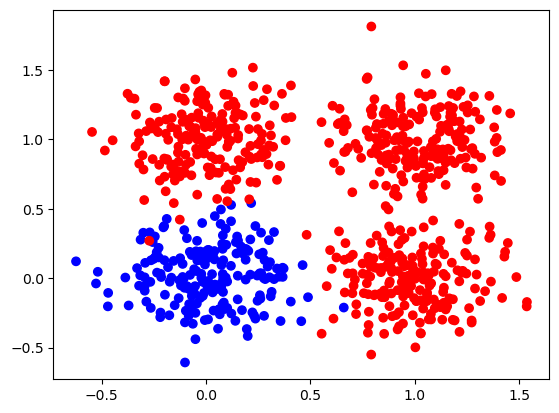

In [11]:
data = np.fromfile("data/dataHoldout.txt")
data = data.reshape(-1, 3)

X_holdout = data[:, :2]
y_holdout = data[:, 2]

cores = np.where(y_holdout==0, 'red','blue')
plt.scatter(X_holdout[:,0],X_holdout[:,1], c=cores)

In [12]:
np.random.seed(1)
index = np.random.permutation(len(data))
split_index = int(0.7 * len(data))

In [13]:
train_index = index[:split_index]
test_index = index[split_index:]

train_data = data[train_index]
test_data = data[test_index]

Xh_train = train_data[:, :2]
yh_train = train_data[:, 2]

Xh_test = test_data[:, :2]
yh_test = test_data[:, 2]

## 3.1. Resultados

In [14]:
p= Perceptron(learning_rate=0.1)
activation= Degree()
xh_train = np.insert(Xh_train, 0, 1, axis=1)
xh_test = np.insert(Xh_test, 0, 1, axis=1)

holdoutAdjusts = 0
max_epochs = 100

for epoch in range(max_epochs):
    permutation = np.random.permutation(len(xh_train))
    xh_train_permuted = xh_train[permutation]
    yh_train_permuted = yh_train[permutation]

    for i in range(len(xh_train_permuted)):
        u = np.dot(xh_train_permuted[i], p.w)
        yh_pred = activation.f(u)
        error = yh_train_permuted[i] - yh_pred

        if error != 0:
            p.w = p.w + p.learning_rate * error * xh_train_permuted[i]
            holdoutAdjusts += 1

print(f'Pesos finais: {p.w}')
print(f'Total de ajustes: {holdoutAdjusts}')


Pesos iniciais: [ 0.06052999  0.17172978 -0.14757037]
Pesos finais: [ 0.26052999 -0.49726118 -0.49140535]
Total de ajustes: 2850


In [15]:
yh_final = {}
for i in range(len(xh_test)):
        u = np.dot(xh_test[i], p.w)
        yh_predicted = activation.f(u)
        yh_final[i] = {"real":int(yh_test[i]),"predicted":yh_predicted}
classes = [0, 1]

confusion = [[0 for _ in classes] for _ in classes]

for v in yh_final.values():
    real = v["real"]
    pred = v["predicted"]
    confusion[real][pred] += 1

confusion = np.array(confusion)

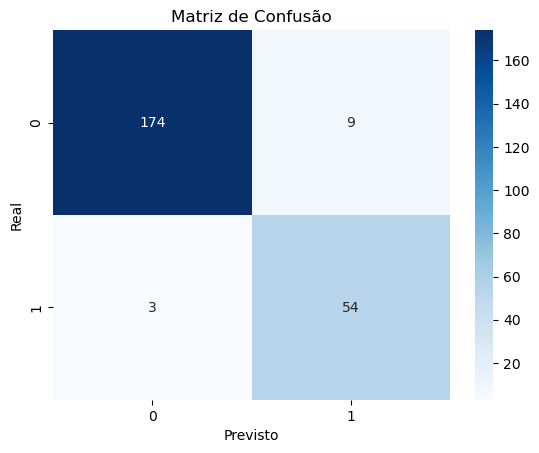

In [16]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [17]:
yh_predicted_test = []
for i in range(len(xh_test)):
    u = np.dot(xh_test[i], p.w)
    yh_predicted_test.append(activation.f(u))

acc = accuracy_score(yh_test, yh_predicted_test)
prec = precision_score(yh_test, yh_predicted_test)
rec = recall_score(yh_test, yh_predicted_test)
f1 = f1_score(yh_test, yh_predicted_test)

print(f"Acurácia: {acc:.2%}")
print(f"Precisão: {prec:.2%}")
print(f"Revocação: {rec:.2%}")
print(f"F1-Score: {f1:.2%}")


Acurácia: 95.00%
Precisão: 85.71%
Revocação: 94.74%
F1-Score: 90.00%


## 3.2. Conclusão

Diante de um problema não linearmente separável, o Perceptron foi capaz de produzir uma solução relativamente eficaz, considerando suas limitações. O resultado alcançado mostra que, apesar de o modelo não conseguir capturar fronteiras complexas, ele ainda consegue distinguir razoavelmente bem as classes em cenários com certa separabilidade.

A acurácia de 83,75% indica que a maioria das amostras foi corretamente classificada. Além disso, a revocação de 100% mostra que o modelo foi capaz de identificar todos os exemplos da classe positiva, ou seja, não deixou nenhum caso positivo passar despercebido. 

Por outro lado, a precisão de 59,38% indica que uma parte considerável das predições positivas foram incorretas. O F1-Score de 74,51%, por sua vez, resume o equilíbrio entre essas duas métricas, demonstrando um desempenho moderado.

Diante disso, conclui-se que o Perceptron, devido às suas limitações, não é adequado para problemas não linearmente separáveis. Portanto, é necessário recorrer a modelos mais complexos que são capazes de capturar relações não lineares de forma eficiente.